In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX


df = pd.read_parquet("cmm_erdos_bootcamp_2020_timeseries.pq", engine='pyarrow')
df.date_val = pd.to_datetime(df.date_val)

train_test_sep = datetime(2019, 1, 1)
df_train = df.loc[df.date_val < train_test_sep]
df_test = df.loc[df.date_val >= train_test_sep]


train_a, train_b, train_c = df_train.volume_A.values, df_train.volume_B.values, df_train.volume_C.values
test_a, test_b, test_c = df_test.volume_A.values, df_test.volume_B.values, df_test.volume_C.values

def mpe(actual, prediction):
    return np.mean(np.abs((actual - prediction) / actual))

In [4]:
def fitit(train, test, order, seasonal_order, method='lbfgs', max_iter=50, label=""):
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    fit = model.fit(disp=False)

    yhat = fit.forecast(len(test), method=method, max_iter=max_iter)

    fig, ax = plt.subplots(figsize=(18, 5))
    plt.plot(test, alpha=.5)
    plt.plot(yhat)
    
    R = test - yhat
    perc = np.mean(np.abs(R / test))
    
    title = fr"MPE: {100.0*perc:.2f}% "
    title = title + "order: " + str(order)
    title = title + ", seasonal order: " + str(seasonal_order)
    ax.set_title(title, fontsize=16)
    
    return yhat

# Volume A

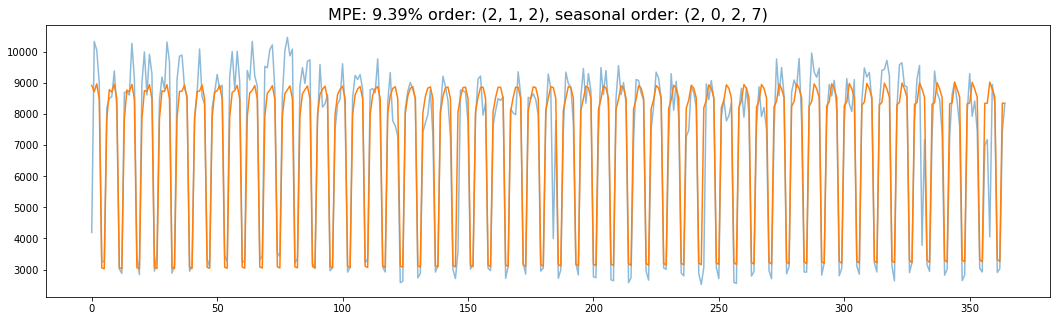

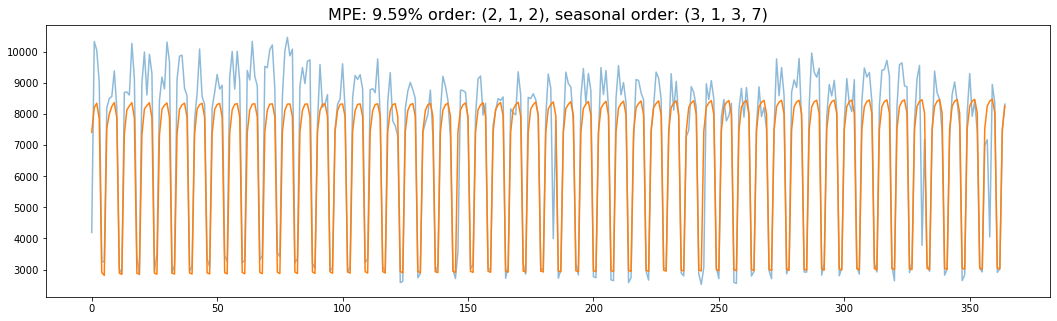

In [6]:
a1 = fitit(train_a, test_a, (2, 1, 2), (2, 0, 2, 7))
a2 = fitit(train_a, test_a, (2, 1, 2), (3, 1, 3, 7))

# Volume B

/home/mohammed/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mohammed/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mohammed/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mohammed/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  wa

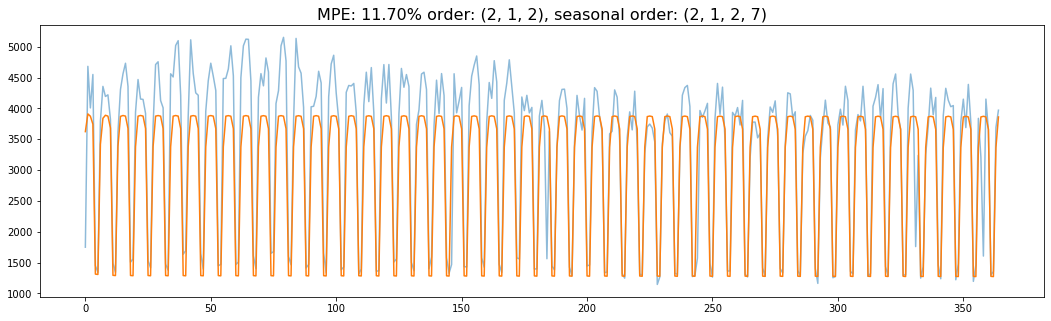

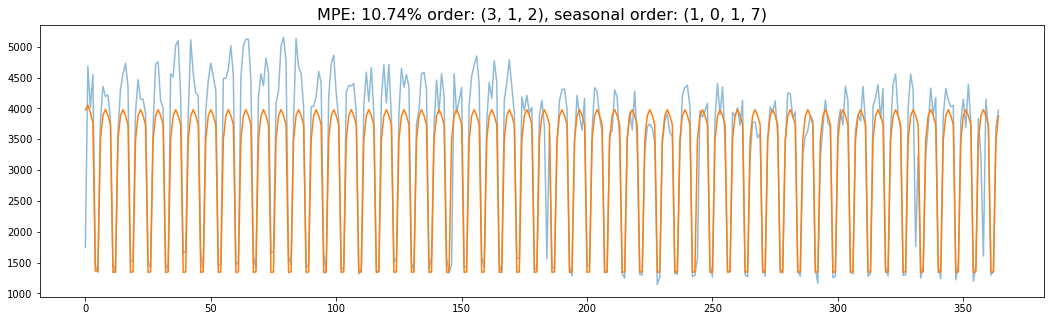

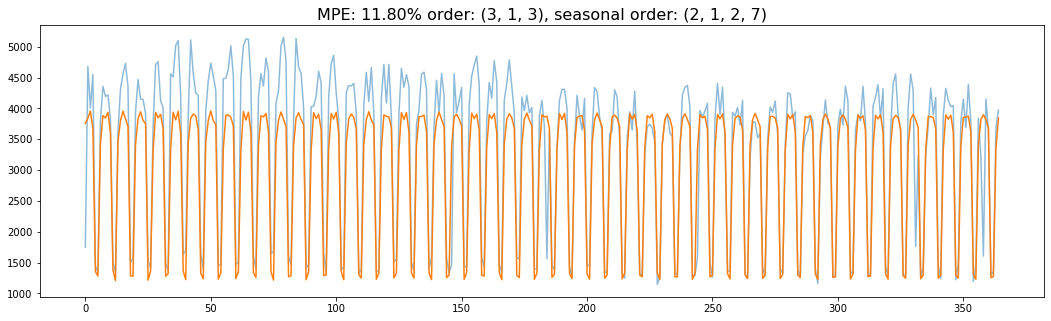

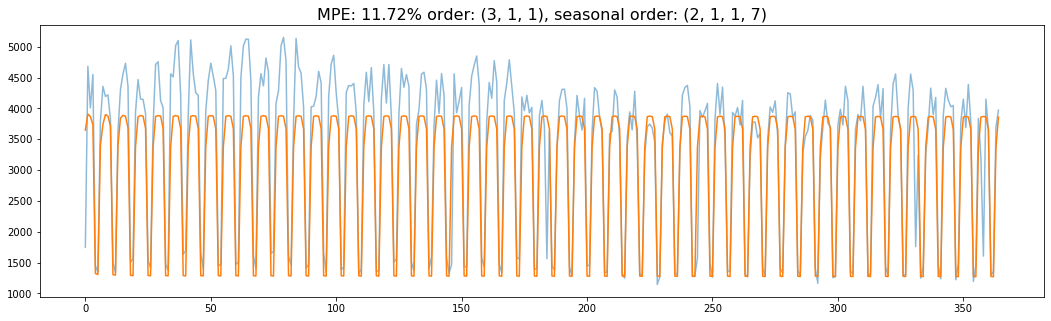

In [19]:
b1 = fitit(train_b, test_b, (2, 1, 2), (2, 1, 2, 7))
b2 = fitit(train_b, test_b, (3, 1, 2), (1, 0, 1, 7), method='powell')
b3 = fitit(train_b, test_b, (3, 1, 3), (2, 1, 2, 7))
b4 = fitit(train_b, test_b, (3, 1, 1), (2, 1, 1, 7))

# Volume C

/home/mohammed/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


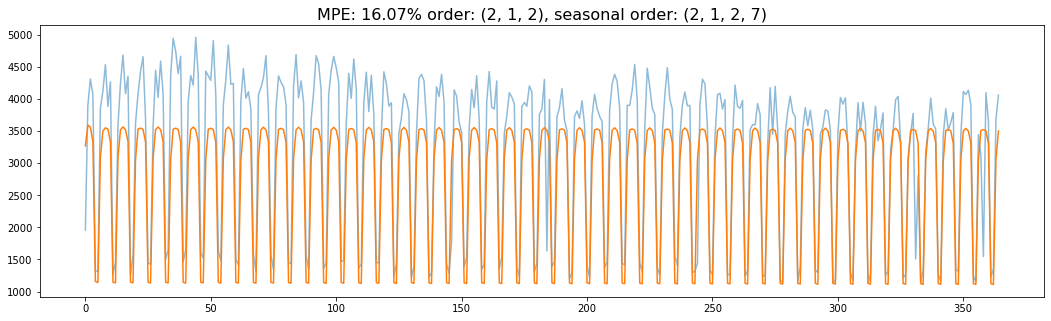

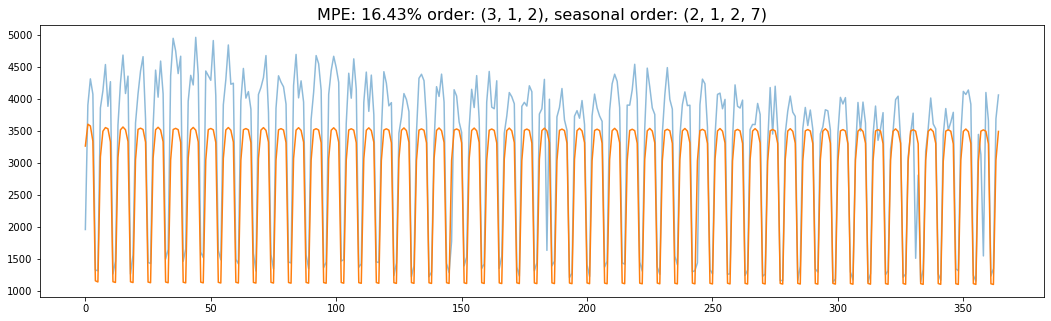

In [33]:
c1 = fitit(train_c, test_c, (2, 1, 2), (2, 1, 2, 7))
c2 = fitit(train_c, test_c, (3, 1, 2), (2, 1, 2, 7))